In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms.linear_transform import LinearMatrix
from nopt.transforms.fastjlt import FastJLT
from nopt.constraints.sparsity import *
from nopt.constraints.rank import *
from nopt.problems.linear_problem import *
from nopt.problems.linear_problem_sum import *
from nopt.solvers.niht import *
from nopt.solvers.naht import *
from nopt.tests.generate_lsmat1 import *
from scipy.linalg import hadamard

In [2]:
m = 100
n = 100
rho_r = 0.1
rho_s = 0.1
delta = 0.5

p = round(delta*m*n)
s = round(rho_s*p)
alpha = s/(m*n)
r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))

In [3]:
l0, s0 = GenerateLSMat1((m,n), r, s, 1)
x0 = l0 + s0
HTr = Rank(r)
HTs = Sparsity(s)

# Amat = np.random.normal(0,1, (p,m*n)) / np.sqrt(m*n)
# A = LinearMatrix(Amat, shape_input = (m,n))
#Amat = hadamard(m*n)
#Amat = Amat[1:p,:] / np.sqrt(m*n)
#A = LinearMatrix(Amat[1:p,:], shape_input = (m,n))
A = FastJLT(shape_input = (m,n), shape_output= (p,1))
b = A.matvec(x0)

In [4]:
solver = NAHT(logverbosity = 2, maxiter = 5000)
problem = LinearProblemSum(A, b, (HTr, HTs))

In [5]:
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm
 iter		   cost val	    grad. norm
    1	+1.2199107513512936e+03	5.28767477e+00
    2	+2.5533365775593606e+02	3.75971006e+00
    3	+1.1978648696137151e+02	2.87593385e+00
    4	+7.3314338815142889e+01	2.30970184e+00
    5	+4.6833262358944651e+01	1.86102083e+00
    6	+3.1486766582506462e+01	1.55896486e+00
    7	+2.1630433929712655e+01	1.30150543e+00
    8	+1.5173034860384023e+01	1.10336101e+00
    9	+1.0525828931724446e+01	8.98196638e-01
   10	+7.4377236119346044e+00	7.52222666e-01
   11	+5.1411514927351822e+00	6.39423319e-01
   12	+3.4685164180959838e+00	5.26970072e-01
   13	+2.3306753335411696e+00	4.43594098e-01
   14	+1.5927351466610282e+00	3.66194504e-01
   15	+1.0932882560515769e+00	2.95138009e-01
   16	+7.0812668802869383e-01	2.35742601e-01
   17	+4.6102593316174739e-01	2.00395831e-01
   18	+2.9633049998796551e-01	1.64939069e-01
   19	+1.9080081134739094e-01	1.38908016e-01
   20	+1.1298897524478217e-01	1.09147327e-01
   21	+6.4781840359601509e-02	

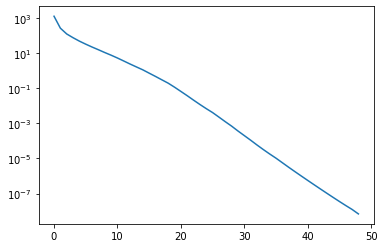

In [6]:
plt.semilogy(opt_log['iterations']['fx'])